<a href="https://colab.research.google.com/github/MannatPruthi/Topsis-for-pre-trained-models/blob/main/Topsis_for_pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

# Load data from the CSV file
data = pd.read_csv('data.csv')

# Extract relevant columns
rouge_scores = data['Rouge_Scores'].values
length_of_summary = data['Length_of_Summary'].values
training_time = data['Training_Time'].values

# Weights for each parameter
weights = np.array([0.6, 0.5, 0.5])

# Normalize the matrix
normalized_matrix = np.column_stack([
    rouge_scores / np.max(rouge_scores),
    1 - (length_of_summary / np.max(length_of_summary)),
    1 - (training_time / np.max(training_time))
])

# Calculate the weighted normalized decision matrix
weighted_normalized_matrix = normalized_matrix * weights

# Ideal and Negative Ideal solutions
ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)

# Calculate the separation measures
distance_to_ideal = np.sqrt(np.sum((weighted_normalized_matrix - ideal_solution)**2, axis=1))
distance_to_negative_ideal = np.sqrt(np.sum((weighted_normalized_matrix - negative_ideal_solution)**2, axis=1))

# Calculate the TOPSIS scores
topsis_scores = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

# Rank the models based on TOPSIS scores
data['TOPSIS_Score'] = topsis_scores
data['Rank'] = data['TOPSIS_Score'].rank(ascending=False)

# Print the results
print("Model Ranking:")
print(data[['Model', 'TOPSIS_Score', 'Rank']].sort_values(by='Rank'))

data.to_csv('result.csv', index=False)

Model Ranking:
        Model  TOPSIS_Score  Rank
3        BART      0.790405   1.0
0  BERTSumExt      0.723580   2.0
2          T5      0.578941   3.0
5       UniLM      0.321879   4.0
1       GPT-3      0.276420   5.0
4     Pegasus      0.202346   6.0


Model Ranking Table:
        Model  Rouge_Scores  Length_of_Summary  Training_Time  Rank  \
3        BART          0.80                145              8   1.0   
0  BERTSumExt          0.75                130              9   2.0   
2          T5          0.78                140             10   3.0   
5       UniLM          0.75                130             12   4.0   
1       GPT-3          0.82                150             12   5.0   
4     Pegasus          0.79                138             13   6.0   

   TOPSIS_Score  
3      0.790405  
0      0.723580  
2      0.578941  
5      0.321879  
1      0.276420  
4      0.202346  


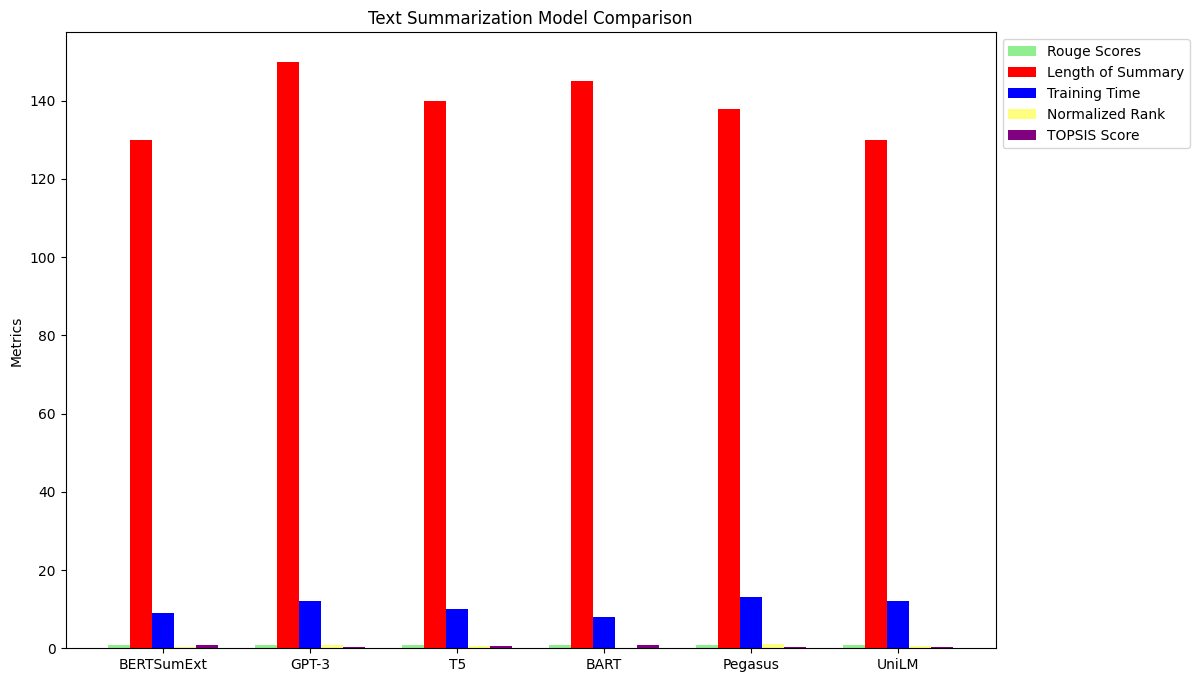

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import result
data = pd.read_csv('result.csv')

# Display the table
print("Model Ranking Table:")
print(data[['Model', 'Rouge_Scores', 'Length_of_Summary', 'Training_Time', 'Rank', 'TOPSIS_Score']].sort_values(by='Rank'))

# Bar chart
labels = data['Model']
num_models = len(labels)

# Parameters for bar chart
rouge_scores = data['Rouge_Scores']
length_of_summary = data['Length_of_Summary']
training_time = data['Training_Time']
topsis_score = data['TOPSIS_Score']

# Normalize ranks to a scale of 0 to 1 for better comparison
normalized_ranks = data['Rank'] / np.max(data['Rank'])

# Plot the bar chart with custom colors
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(num_models)

# Set different colors for each metric
color_rouge = 'lightgreen'
color_length = 'red'
color_time = 'blue'
color_rank = 'yellow'
color_topsis = 'purple'

ax.bar(index - bar_width, rouge_scores, width=bar_width, label='Rouge Scores', color=color_rouge)
ax.bar(index, length_of_summary, width=bar_width, label='Length of Summary', color=color_length)
ax.bar(index + bar_width, training_time, width=bar_width, label='Training Time', color=color_time)
ax.bar(index + 2 * bar_width, normalized_ranks, width=bar_width, label='Normalized Rank', color=color_rank, alpha=0.5)
ax.bar(index + 3 * bar_width, topsis_score, width=bar_width, label='TOPSIS Score', color=color_topsis)

ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.set_ylabel('Metrics')
ax.set_title('Text Summarization Model Comparison')

# Bring the legend outside and adjust its position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure before showing it
plt.savefig('barchart.png', bbox_inches='tight')
plt.show()

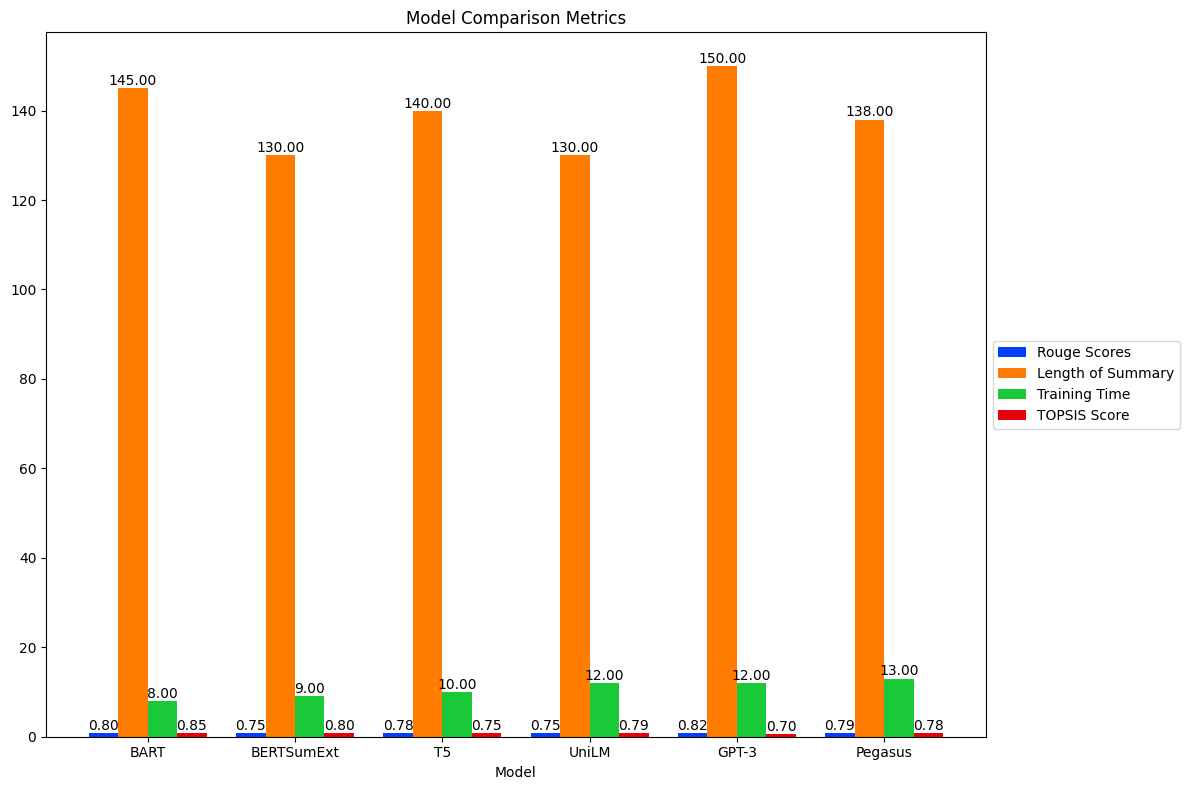

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame with your model comparison data
# Replace the following line with your actual DataFrame
data = {
    'Model': ['BERTSumExt', 'GPT-3', 'T5', 'BART', 'Pegasus', 'UniLM'],
    'Rouge Scores': [0.75, 0.82, 0.78, 0.80, 0.79, 0.75],
    'Length of Summary': [130, 150, 140, 145, 138, 130],
    'Training Time': [9, 12, 10, 8, 13, 12],
    'Rank': [2, 5, 3, 1, 6, 4],
    'TOPSIS Score': [0.8, 0.7, 0.75, 0.85, 0.78, 0.79]  # Add TOPSIS scores
}

df = pd.DataFrame(data)

# Sorting the DataFrame by Rank for better visualization
df = df.sort_values(by='Rank')

# Set a color palette for better distinction
sns.set_palette("bright")

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
bar_positions = range(len(df['Model']))

# Plot each metric separately for better clarity
for i, metric in enumerate(['Rouge Scores', 'Length of Summary', 'Training Time', 'TOPSIS Score']):
    ax.bar(
        [pos + i * bar_width for pos in bar_positions],
        df[metric],
        width=bar_width,
        label=metric
    )

ax.set_xticks([pos + 1.5 * bar_width for pos in bar_positions])
ax.set_xticklabels(df['Model'])
ax.set_xlabel('Model')
ax.set_title('Model Comparison Metrics')

# Display the values on top of each bar
for i, metric in enumerate(['Rouge Scores', 'Length of Summary', 'Training Time', 'TOPSIS Score']):
    for j, value in enumerate(df[metric]):
        ax.text(j + i * bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
